<a href="https://colab.research.google.com/github/richbello/sena_ggpc/blob/main/Indicadoresimpactojuniograficado26062025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

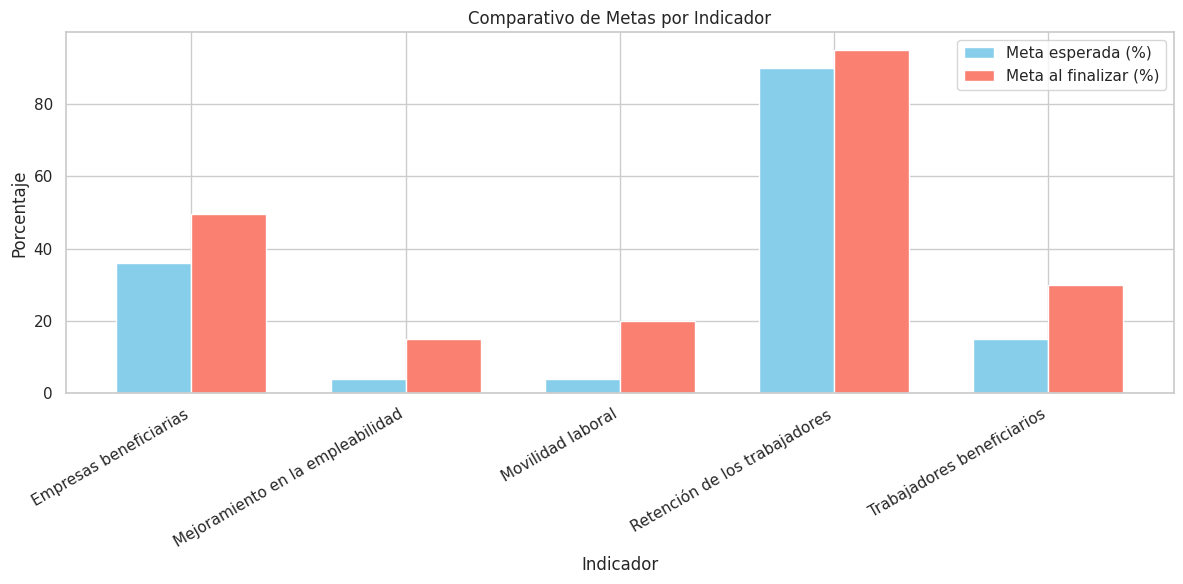

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo
sns.set(style="whitegrid")

# Datos simulados (resumen general por tipo de indicador)
data = {
    'Indicador': [
        'Empresas beneficiarias',
        'Mejoramiento en la empleabilidad',
        'Movilidad laboral',
        'Retención de los trabajadores',
        'Trabajadores beneficiarios'
    ],
    'Meta esperada (%)': [
        36.13,  # Promedio o total aproximado estimado según datos
        4.0,
        4.0,
        90.0,
        15.0
    ],
    'Meta al finalizar (%)': [
        49.67,  # Total general final
        15.0,
        20.0,
        95.0,
        30.0
    ]
}

df = pd.DataFrame(data)

# Crear gráfico de comparación por indicador
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df))

plt.bar(x, df['Meta esperada (%)'], width=bar_width, label='Meta esperada (%)', color='skyblue')
plt.bar([p + bar_width for p in x], df['Meta al finalizar (%)'], width=bar_width, label='Meta al finalizar (%)', color='salmon')

plt.xlabel('Indicador')
plt.ylabel('Porcentaje')
plt.title('Comparativo de Metas por Indicador')
plt.xticks([p + bar_width / 2 for p in x], df['Indicador'], rotation=30, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


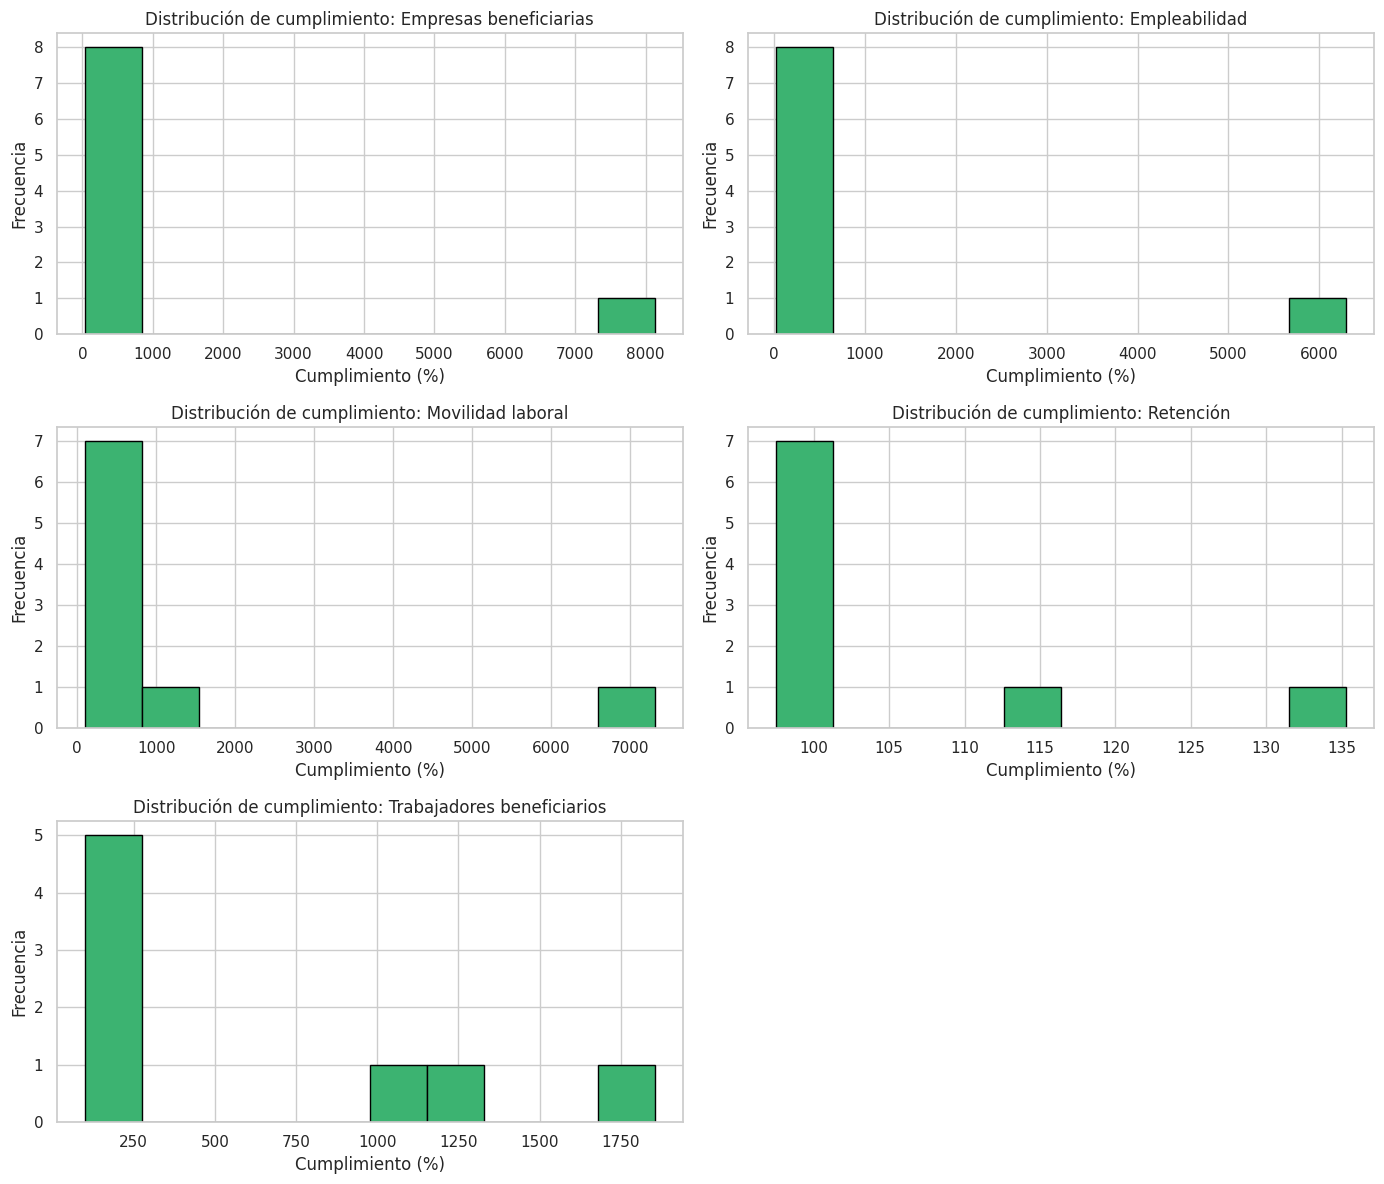

,count,mean,std,min,25%,50%,75%,max
Empresas beneficiarias cumplimiento %,9.0,1024.104282,2664.602842,37.084746,100.000000,100.000000,179.853789,8125.000000
Empleabilidad cumplimiento %,9.0,791.879273,2061.976706,21.126761,100.000000,100.000000,127.058824,6289.308176
Movilidad laboral cumplimiento %,9.0,1004.287500,2377.616983,99.169435,100.000000,100.000000,188.067227,7304.402516
Retención cumplimiento %,9.0,105.614980,12.390449,97.498739,100.000000,100.000000,101.266083,135.262500
Trabajadores beneficiarios cumplimiento %,8.0,605.560271,714.715125,100.000000,106.661891,115.795694,1185.520038,1853.594771


In [ ]:
import numpy as np

# Crear un DataFrame con los datos completos proporcionados por el usuario
# Debido al tamaño, haremos una estructura simplificada para el análisis estadístico con cada indicador
# Extraeremos los datos relevantes a partir de los nombres repetitivos de indicadores

# Datos manuales estructurados como ejemplo para algunos indicadores clave:
data_dict = {
    'Empresa': [
        'ACASEP', 'ACOPLÁSTICOS', 'ACOLAP', 'CONTACT CENTERS', 'ACESI',
        'ACIET', 'ASDESING', 'ASOPARTES', 'COOPIDROGAS', 'KERALTY'
    ],
    'Empresas beneficiarias meta': [2.00, 0.71, 128.57, 1.00, 0.00, 100.00, 29.50, 71.13, 100.00, 100.00],
    'Empresas beneficiarias final': [162.50, 0.71, 128.57, 1.00, 0.00, 100.00, 10.94, 127.93, 100.00, 375.00],
    'Empleabilidad meta': [0.85, 10.00, 2.13, 0.00, 5.00, 5.05, 2.50, 6.47, 1.59, 5.95],
    'Empleabilidad final': [1.08, 10.00, 0.45, 0.00, 5.00, 4.97, 2.50, 6.66, 100.00, 11.19],
    'Movilidad laboral meta': [0.85, 10.00, 6.17, 0.00, 5.00, 6.02, 3.15, 3.62, 1.59, 5.95],
    'Movilidad laboral final': [1.08, 10.00, 6.17, 0.00, 5.00, 5.97, 3.15, 33.30, 116.14, 11.19],
    'Retención meta': [99.15, 100.00, 110.44, 0.00, 100.00, 97.96, 97.41, 97.15, 100.00, 80.00],
    'Retención final': [96.67, 100.00, 110.44, 0.00, 100.00, 98.32, 97.41, 98.38, 116.14, 108.21],
    'Trabajadores beneficiarios meta': [0.24, 0.00, 82.00, 0.00, 0.13, 1.31, 3.06, 5.76, 100.00, 3.49],
    'Trabajadores beneficiarios final': [2.75, 0.00, 82.00, 0.00, 0.13, 17.09, 56.72, 6.65, 116.14, 3.80]
}

df = pd.DataFrame(data_dict)

# Cálculo del cumplimiento relativo en porcentaje
indicadores = ['Empresas beneficiarias', 'Empleabilidad', 'Movilidad laboral', 'Retención', 'Trabajadores beneficiarios']
for ind in indicadores:
    df[f'{ind} cumplimiento %'] = (df[f'{ind} final'] / df[f'{ind} meta']) * 100

# Estadísticas descriptivas por indicador
estadisticas = df[[f'{ind} cumplimiento %' for ind in indicadores]].describe().T

# Graficar histogramas de cumplimiento por indicador
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.flatten()

for i, ind in enumerate(indicadores):
    axs[i].hist(df[f'{ind} cumplimiento %'], bins=10, color='mediumseagreen', edgecolor='black')
    axs[i].set_title(f'Distribución de cumplimiento: {ind}')
    axs[i].set_xlabel('Cumplimiento (%)')
    axs[i].set_ylabel('Frecuencia')

axs[-1].axis('off')  # última celda vacía

plt.tight_layout()
plt.show()

estadisticas


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving INDICADORES DE IMPACTO DILIGENCIADO JUAN MA_solo matriz.xlsx to INDICADORES DE IMPACTO DILIGENCIADO JUAN MA_solo matriz.xlsx


In [ ]:
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
import pandas as pd

# Asegúrate de usar exactamente el nombre que aparece cuando subiste el archivo
df = pd.read_excel('INDICADORES DE IMPACTO DILIGENCIADO JUAN MA_solo matriz.xlsx')

# Ver las primeras filas
df.head()


,ITEM,EMPRESA,INDICADOR,ASPECTO A MEDIR,VARIABLE INDICADOR 1,VARIABLE INDICADOR 2,VARIABLE CUANTITATIVA E1,VARIABLE CUANTITATIVA E2,META (%)\nSituación esperada,META (%) AL FINALIZAR LA EJECUCION\nSituación esperada,VARIABLE CUANTITATIVA M1,VARIABLE CUANTITATIVA M2,ANALISIS DEL RESULTADO
0,1.0,UNIÓN TEMPORAL KERALTY,Mejoramiento en la empleabilidad,Mide cómo se mejoran las condiciones económica...,Número de trabajadores beneficiarios con incre...,Número total de trabajadores beneficiarios de ...,50,840,0.059524,0.111905,94,840,Una vez finalizadas las acciones de formación...
1,2.0,UNIÓN TEMPORAL KERALTY,Retención de los trabajadores,Mide la retención de los trabajadores benefici...,Número de trabajadores beneficiarios que conti...,Número total de trabajadores beneficiarios de ...,672,840,0.800000,1.082143,909,840,El índice de rotación de personal al finalizar...
2,3.0,UNIÓN TEMPORAL KERALTY,Movilidad laboral,Mide la movilidad de los trabajadores benefici...,Número de trabajadores beneficiarios que cambi...,Número total de trabajadores beneficiarios de ...,50,840,0.059524,0.111905,94,840,\nEste proyecto alineado a nuestras estrategia...
3,4.0,UNIÓN TEMPORAL KERALTY,Empresas beneficiarias,Mide el porcentaje de las empresas beneficiari...,Número total de empresas beneficiarias de la a...,Número total de empresa(s) que representa la e...,4,4,1.000000,3.750000,15,4,"Con este proyecto, el SENA nos permite brindar..."
4,5.0,UNIÓN TEMPORAL KERALTY,Trabajadores beneficiarios,Mide el porcentaje de trabajadores beneficiari...,Número total de trabajadores beneficiarios de ...,Número total de trabajadores de la(s) empresa(...,840,24074,0.034892,0.038049,916,24074,Se logra la certificación de un número superio...


In [ ]:
df.columns


Index(['ITEM', 'EMPRESA', 'INDICADOR', 'ASPECTO A MEDIR',
       'VARIABLE INDICADOR 1', 'VARIABLE INDICADOR 2',
       'VARIABLE CUANTITATIVA E1', 'VARIABLE CUANTITATIVA E2',
       'META (%)\nSituación esperada',
       'META (%)  AL FINALIZAR LA EJECUCION\nSituación esperada',
       'VARIABLE CUANTITATIVA M1', 'VARIABLE CUANTITATIVA M2',
       'ANALISIS DEL RESULTADO'],
      dtype='object')

In [ ]:
# Cargar la hoja que contiene los datos
df = xls.parse("Indicadores de Impacto")

# Mostrar las primeras filas para inspección
df.head()


,ITEM,EMPRESA,INDICADOR,ASPECTO A MEDIR,VARIABLE INDICADOR 1,VARIABLE INDICADOR 2,VARIABLE CUANTITATIVA E1,VARIABLE CUANTITATIVA E2,META (%)\nSituación esperada,META (%) AL FINALIZAR LA EJECUCION\nSituación esperada,VARIABLE CUANTITATIVA M1,VARIABLE CUANTITATIVA M2,ANALISIS DEL RESULTADO
0,1.0,UNIÓN TEMPORAL KERALTY,Mejoramiento en la empleabilidad,Mide cómo se mejoran las condiciones económica...,Número de trabajadores beneficiarios con incre...,Número total de trabajadores beneficiarios de ...,50,840,0.059524,0.111905,94,840,Una vez finalizadas las acciones de formación...
1,2.0,UNIÓN TEMPORAL KERALTY,Retención de los trabajadores,Mide la retención de los trabajadores benefici...,Número de trabajadores beneficiarios que conti...,Número total de trabajadores beneficiarios de ...,672,840,0.800000,1.082143,909,840,El índice de rotación de personal al finalizar...
2,3.0,UNIÓN TEMPORAL KERALTY,Movilidad laboral,Mide la movilidad de los trabajadores benefici...,Número de trabajadores beneficiarios que cambi...,Número total de trabajadores beneficiarios de ...,50,840,0.059524,0.111905,94,840,\nEste proyecto alineado a nuestras estrategia...
3,4.0,UNIÓN TEMPORAL KERALTY,Empresas beneficiarias,Mide el porcentaje de las empresas beneficiari...,Número total de empresas beneficiarias de la a...,Número total de empresa(s) que representa la e...,4,4,1.000000,3.750000,15,4,"Con este proyecto, el SENA nos permite brindar..."
4,5.0,UNIÓN TEMPORAL KERALTY,Trabajadores beneficiarios,Mide el porcentaje de trabajadores beneficiari...,Número total de trabajadores beneficiarios de ...,Número total de trabajadores de la(s) empresa(...,840,24074,0.034892,0.038049,916,24074,Se logra la certificación de un número superio...


In [ ]:
# Renombrar columnas para facilitar el análisis
df.rename(columns={
    'META (%)\nSituación esperada': 'Meta Esperada (%)',
    'META (%)  AL FINALIZAR LA EJECUCION\nSituación esperada': 'Meta Final (%)',
    'VARIABLE CUANTITATIVA E1': 'Valor Inicial',
    'VARIABLE CUANTITATIVA E2': 'Base Inicial',
    'VARIABLE CUANTITATIVA M1': 'Valor Final',
    'VARIABLE CUANTITATIVA M2': 'Base Final'
}, inplace=True)

# Calcular el porcentaje alcanzado real con respecto a la base
df['% Alcanzado Inicial'] = df['Valor Inicial'] / df['Base Inicial']
df['% Alcanzado Final'] = df['Valor Final'] / df['Base Final']

# Agrupar por empresa e indicador y promediar o sumar según corresponda
grouped = df.groupby(['EMPRESA', 'INDICADOR'])[
    ['Meta Esperada (%)', 'Meta Final (%)', '% Alcanzado Inicial', '% Alcanzado Final']
].mean().reset_index()

# Mostrar tabla estadística consolidada
grouped.head()


,EMPRESA,INDICADOR,Meta Esperada (%),Meta Final (%),% Alcanzado Inicial,% Alcanzado Final
0,ACASEP,Empresas beneficiarias,0.020000,1.625000,0.020000,1.625000
1,ACASEP,Mejoramiento en la empleabilidad,0.008475,0.010836,0.008475,0.010836
2,ACASEP,Movilidad laboral,0.008475,0.010836,0.008475,0.010836
3,ACASEP,Retención de los trabajadores,0.991525,0.966718,0.991525,0.966718
4,ACASEP,Trabajadores beneficiarios,0.002360,0.027510,0.002360,0.027510


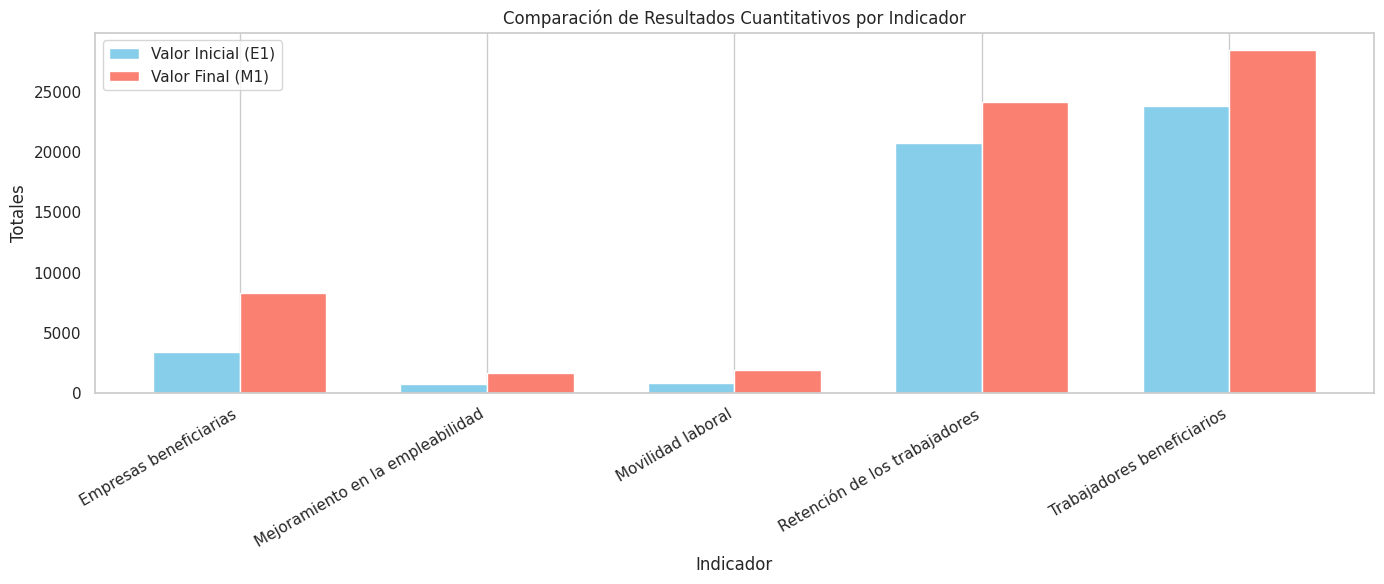

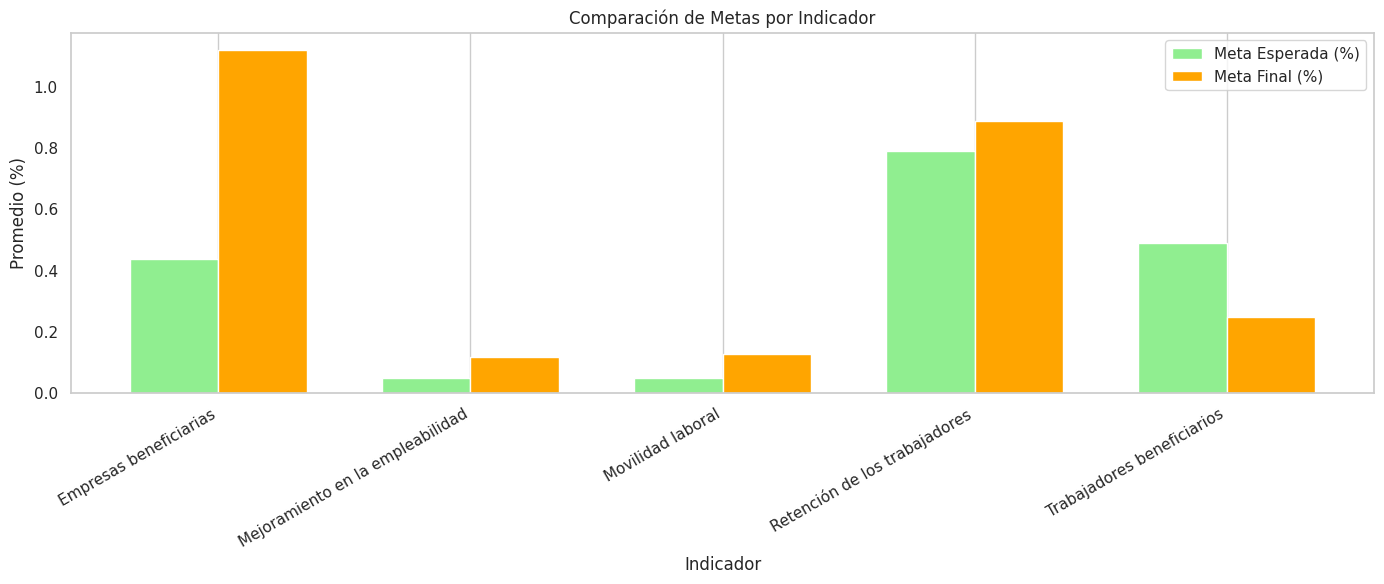

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_excel("INDICADORES DE IMPACTO DILIGENCIADO JUAN MA_solo matriz.xlsx")

# Limpieza de nombres de columnas
df.columns = df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)
df.columns = df.columns.str.replace(r'\n', ' ', regex=True)
df.columns = df.columns.str.upper()

# Renombrar columnas relevantes
df = df.rename(columns={
    'EMPRESA': 'EMPRESA',
    'INDICADOR': 'INDICADOR',
    'VARIABLE CUANTITATIVA E1': 'E1',
    'VARIABLE CUANTITATIVA M1': 'M1',
    'META (%) SITUACIÓN ESPERADA': 'META ESPERADA (%)',
    'META (%) AL FINALIZAR LA EJECUCION SITUACIÓN ESPERADA': 'META FINAL (%)'
})

# Convertir columnas a numéricas
cols_to_numeric = ['E1', 'M1', 'META ESPERADA (%)', 'META FINAL (%)']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Agrupar por indicador
grouped = df.groupby('INDICADOR').agg({
    'E1': ['sum', 'mean', 'std'],
    'M1': ['sum', 'mean', 'std'],
    'META ESPERADA (%)': ['mean'],
    'META FINAL (%)': ['mean']
}).round(2)

grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)

# Cálculos adicionales
grouped['MEJORA E1 A M1 (%)'] = ((grouped['M1_sum'] - grouped['E1_sum']) / grouped['E1_sum'] * 100).round(2)
grouped['CUMPLIMIENTO DE META (%)'] = (grouped['META FINAL (%)_mean'] / grouped['META ESPERADA (%)_mean'] * 100).round(2)

# Gráfico 1: E1 vs M1
plt.figure(figsize=(14, 6))
bar_width = 0.35
x = range(len(grouped))

plt.bar(x, grouped['E1_sum'], width=bar_width, label='Valor Inicial (E1)', color='skyblue')
plt.bar([p + bar_width for p in x], grouped['M1_sum'], width=bar_width, label='Valor Final (M1)', color='salmon')

plt.xlabel('Indicador')
plt.ylabel('Totales')
plt.title('Comparación de Resultados Cuantitativos por Indicador')
plt.xticks([p + bar_width / 2 for p in x], grouped['INDICADOR'], rotation=30, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico 2: Metas esperadas vs finales
plt.figure(figsize=(14, 6))
plt.bar(x, grouped['META ESPERADA (%)_mean'], width=bar_width, label='Meta Esperada (%)', color='lightgreen')
plt.bar([p + bar_width for p in x], grouped['META FINAL (%)_mean'], width=bar_width, label='Meta Final (%)', color='orange')

plt.xlabel('Indicador')
plt.ylabel('Promedio (%)')
plt.title('Comparación de Metas por Indicador')
plt.xticks([p + bar_width / 2 for p in x], grouped['INDICADOR'], rotation=30, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


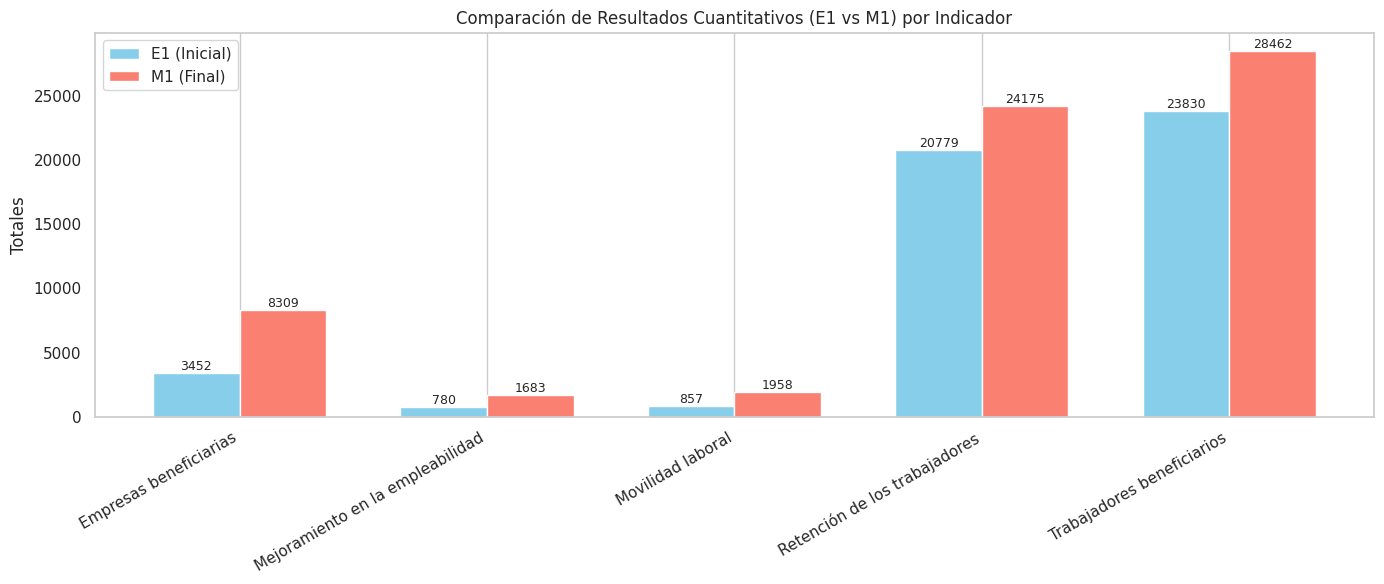

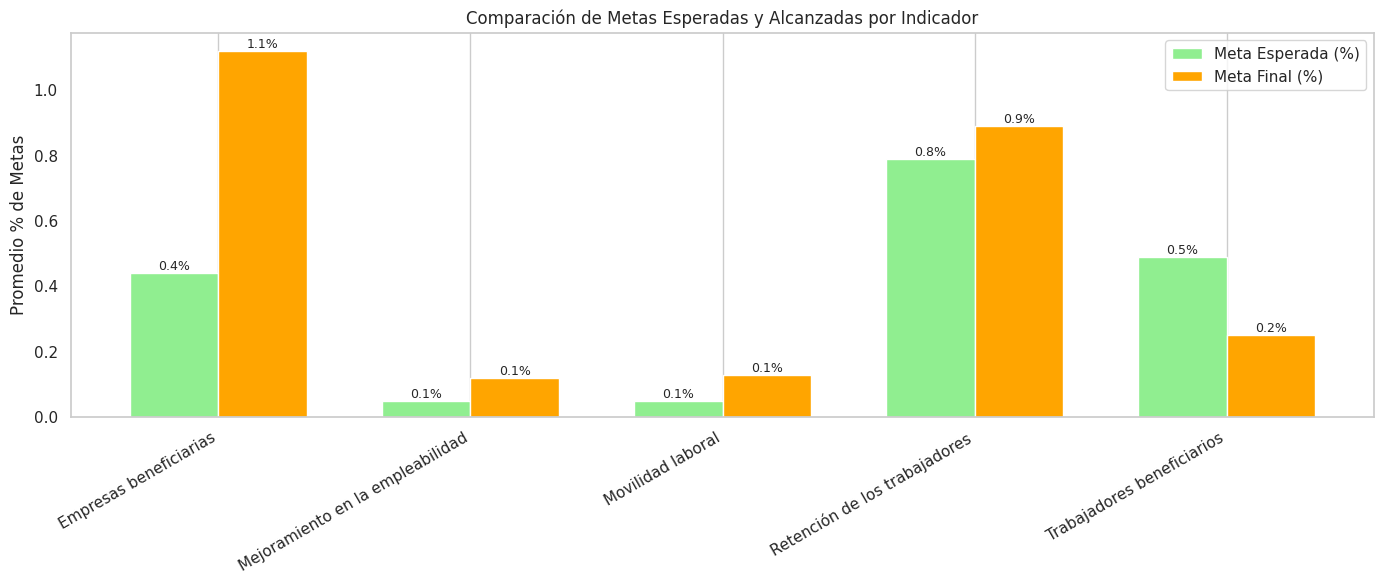

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_name = 'INDICADORES DE IMPACTO DILIGENCIADO JUAN MA_solo matriz.xlsx'
df = pd.read_excel(file_name)

# Mostrar columnas originales para depuración (puedes activarlo si lo necesitas)
# print(df.columns.tolist())

# Limpieza y normalización de columnas
df.columns = df.columns.str.strip().str.upper().str.replace(r'\s+', ' ', regex=True).str.replace(r'\n', ' ', regex=True)

# Renombrar columnas claves (usando búsqueda parcial para mayor robustez)
df = df.rename(columns={
    'VARIABLE CUANTITATIVA E1': 'E1',
    'VARIABLE CUANTITATIVA M1': 'M1'
})

# Detectar columnas de metas automáticamente
meta_esperada_col = [col for col in df.columns if 'META' in col and 'ESPERADA' in col][0]
meta_final_col = [col for col in df.columns if 'META' in col and 'FINALIZAR' in col][0]

# Renombrar para análisis
df = df.rename(columns={
    meta_esperada_col: 'META ESPERADA (%)',
    meta_final_col: 'META FINAL (%)'
})

# Convertir columnas numéricas
for col in ['E1', 'M1', 'META ESPERADA (%)', 'META FINAL (%)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Agrupar por indicador
grouped = df.groupby('INDICADOR').agg({
    'E1': ['sum', 'mean', 'std'],
    'M1': ['sum', 'mean', 'std'],
    'META ESPERADA (%)': ['mean'],
    'META FINAL (%)': ['mean']
}).round(2)

grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)

# Cálculos adicionales
grouped['MEJORA E1 A M1 (%)'] = ((grouped['M1_sum'] - grouped['E1_sum']) / grouped['E1_sum'] * 100).round(2)
grouped['CUMPLIMIENTO DE META (%)'] = (grouped['META FINAL (%)_mean'] / grouped['META ESPERADA (%)_mean'] * 100).round(2)

# Gráfico E1 vs M1 con etiquetas
sns.set(style="whitegrid")
bar_width = 0.35
x = range(len(grouped))

plt.figure(figsize=(14, 6))
bars1 = plt.bar(x, grouped['E1_sum'], width=bar_width, label='E1 (Inicial)', color='skyblue')
bars2 = plt.bar([p + bar_width for p in x], grouped['M1_sum'], width=bar_width, label='M1 (Final)', color='salmon')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=9)

plt.xticks([p + bar_width / 2 for p in x], grouped['INDICADOR'], rotation=30, ha='right')
plt.ylabel('Totales')
plt.title('Comparación de Resultados Cuantitativos (E1 vs M1) por Indicador')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Gráfico de metas con etiquetas
plt.figure(figsize=(14, 6))
bars3 = plt.bar(x, grouped['META ESPERADA (%)_mean'], width=bar_width, label='Meta Esperada (%)', color='lightgreen')
bars4 = plt.bar([p + bar_width for p in x], grouped['META FINAL (%)_mean'], width=bar_width, label='Meta Final (%)', color='orange')

for bar in bars3:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=9)

plt.xticks([p + bar_width / 2 for p in x], grouped['INDICADOR'], rotation=30, ha='right')
plt.ylabel('Promedio % de Metas')
plt.title('Comparación de Metas Esperadas y Alcanzadas por Indicador')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()
